In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('weight_height.csv')
df.head()

,Weight,Height
0,74.97,115.84
1,68.62,112.09
2,76.48,115.38
3,85.23,127.83
4,67.66,109.09


Text(0, 0.5, 'Height')

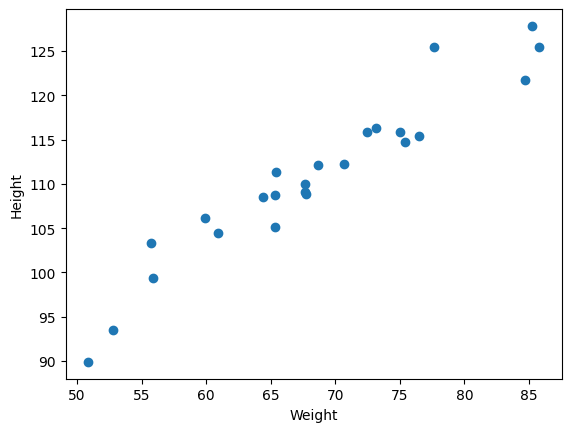

In [4]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.958554
Height,0.958554,1.000000


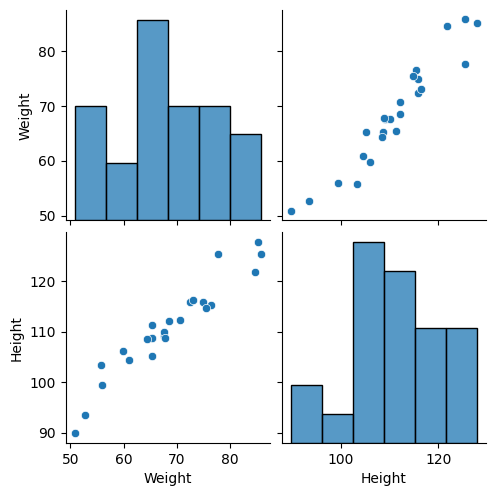

In [6]:
## Seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [7]:
## Independent and Dependent Variables

X = df[['Weight']]  ## your independent variable should be dataframe or 2D Array 
X_series = df['Weight']  ## this will give some problem which we will see later on

X.head()

,Weight
0,74.97
1,68.62
2,76.48
3,85.23
4,67.66


In [ ]:
y = df['Height'] ## Dependent variable can be in series form or 1D array 

In [9]:
## Train Test Split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)



In [10]:
X_train.shape

(18, 1)

In [11]:
## Standardization --> if units are different for X and y then we apply z-score which converts mean = 0 and std dev = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [12]:
X_test = scaler.transform(X_test)

In [15]:
## apply Lineare Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)

lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [18]:
print('Coefficient of slope is : ',lr.coef_)

Coefficient of slope is :  [9.75170609]


In [19]:
print('Intercept of slope is : ',lr.intercept_)

Intercept of slope is :  111.45444444444446


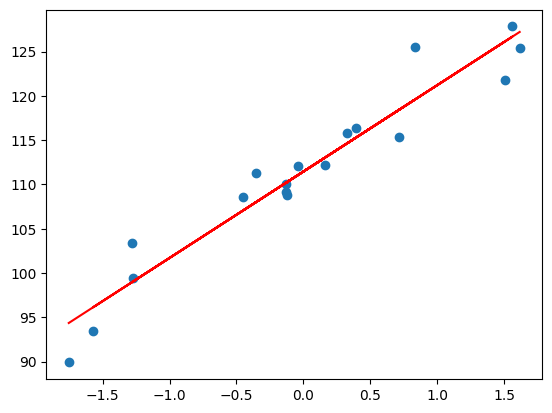

In [22]:
## Plot training data 
plt.scatter(X_train, y_train)
plt.plot(X_train,lr.predict(X_train),color='red')

In [25]:
## Predicition for test data 

y_pred = lr.predict(X_test)
y_pred

array([107.94339943, 102.82502028, 117.03228594, 103.81294272,
       107.97162579, 117.46509006])

In [30]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)   

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse) 
print("Root Mean Squared Error:", rmse) 


Mean Squared Error: 4.793806189512743
Mean Absolute Error: 1.9162732260331292
Root Mean Squared Error: 2.1894762363434648


In [32]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.7660711311336951


In [33]:
# display adjusted-R-squaured value of the model 

1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.7075889139171189

In [35]:
## OLS Linear Regresssion 
import statsmodels.api as sm

In [36]:
model = sm.OLS(y_train,X_train).fit()


In [38]:
predicition = model.predict(X_test)
print(predicition)

[-3.51104501 -8.62942417  5.5778415  -7.64150172 -3.48281866  6.01064562]


In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.1301
Date:                Wed, 23 Apr 2025   Prob (F-statistic):                       0.723
Time:                        17:47:23   Log-Likelihood:                         -110.39
No. Observations:                  18   AIC:                                      222.8
Df Residuals:                      17   BIC:                                      223.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\sachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [43]:
lr.predict(scaler.transform([[80]]))

c:\Users\sachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([121.7649049])